In [1]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1)

rna_embeddings = np.loadtxt('./output/sce_10xPBMC_rna_skip_referenced_random_right_path_embeddings.txt')
atac_embeddings = np.loadtxt('./output/sce_10xPBMC_atac_skip_referenced_random_right_path_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(embeddings)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(30305, 64)
(30305, 64)
(60610, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


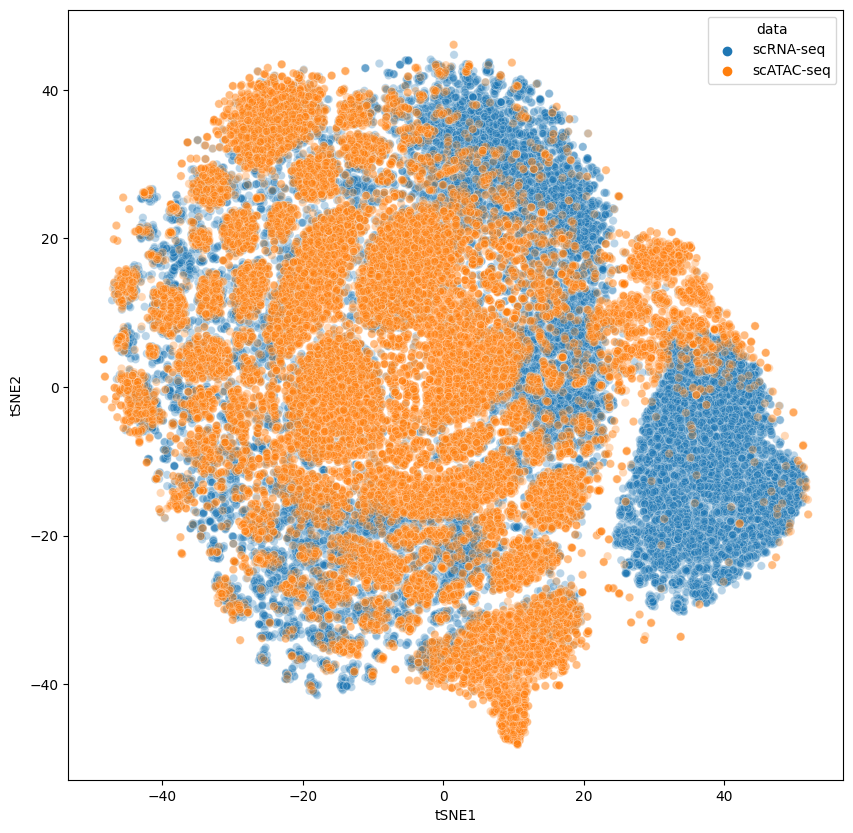

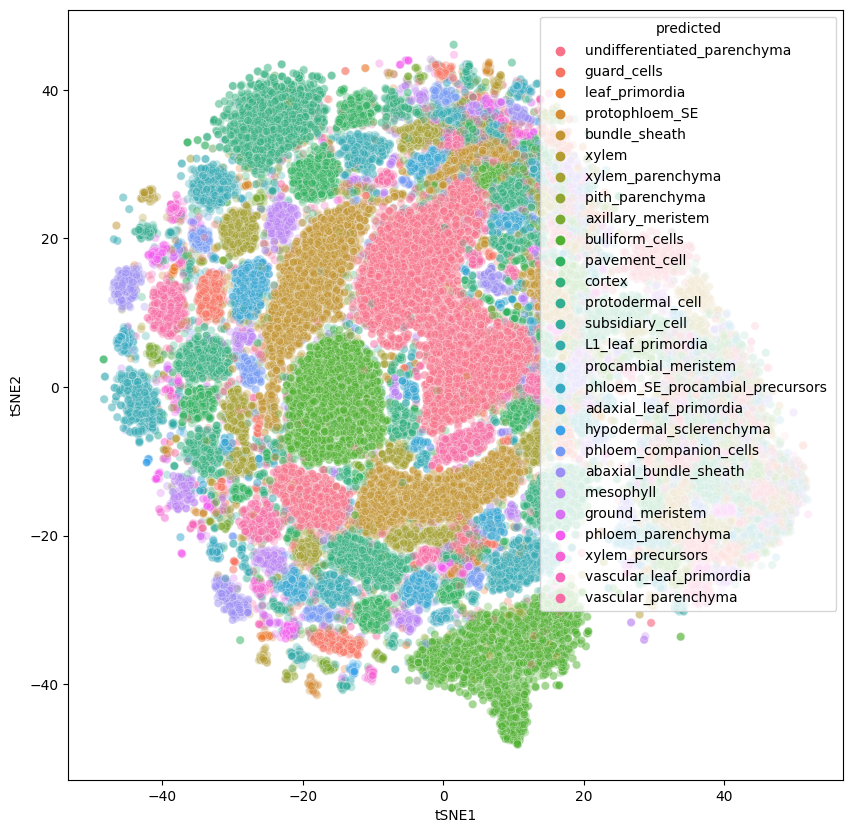

In [2]:
#print(df)
rna_labels = np.loadtxt('./data/maize_leaf_harmony_integrated.v3.subLEIDEN.metadata_fixed.txt')
atac_predictions = np.loadtxt('./output/sce_10xPBMC_atac_skip_referenced_random_right_path_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./data/label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
#print(label_dic)
#for item in labels:
#    print(item)
#    print(label_dic[item.astype(int)])
#print(labels[1])
#print(label_dic[labels[1].astype(int)])
df['predicted'] = label_dic[labels.astype(int)-1]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_skip_referenced_random_right_path_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_skip_referenced__right_path_1.png")

In [3]:
print(df)
#print(df.loc[(df['data'] == "scRNA-seq") & (df['predicted'] == "undifferentiated_parenchyma")])

           tSNE1      tSNE2        data                     predicted
0       3.333642 -18.449369   scRNA-seq  undifferentiated_parenchyma 
1      41.285942 -17.471710   scRNA-seq  undifferentiated_parenchyma 
2     -16.425058 -18.604111   scRNA-seq  undifferentiated_parenchyma 
3      -0.105519  -4.966684   scRNA-seq  undifferentiated_parenchyma 
4      35.395184 -20.605614   scRNA-seq  undifferentiated_parenchyma 
...          ...        ...         ...                           ...
60605 -38.372330   5.592143  scATAC-seq                        cortex
60606  19.536047 -17.239353  scATAC-seq                        cortex
60607 -29.994164   2.428970  scATAC-seq                 bundle_sheath
60608   9.462439 -24.676474  scATAC-seq          procambial_meristem 
60609 -44.189167  14.100546  scATAC-seq         abaxial_bundle_sheath

[60610 rows x 4 columns]


In [8]:
load=np.load("sce_10xPBMC_atac_skip_referenced_random_right_path.npy", allow_pickle=True)

In [20]:
load_list=load.tolist()

print(np.shape(load_list))

(30305, 34408)


In [21]:
print(load_list)

  (1, 0)	1.153033138916832
  (6, 0)	0.9292334325289929
  (10, 0)	2.761641322944568
  (14, 0)	0.5700847304770815
  (29, 0)	1.2629751074638116
  (38, 0)	1.2518708281917492
  (41, 0)	0.9043249920464191
  (44, 0)	0.5627949268578771
  (47, 0)	2.1685888363338797
  (55, 0)	1.114487357932311
  (63, 0)	1.37932257409631
  (64, 0)	1.2683560614589366
  (80, 0)	1.003737009815469
  (86, 0)	0.7579585128766722
  (95, 0)	0.9171616158764042
  (112, 0)	1.1739938669073486
  (121, 0)	1.1944559161784463
  (122, 0)	1.066538816066241
  (132, 0)	0.8428277326671538
  (136, 0)	1.24725468327683
  (151, 0)	0.2447288912245702
  (155, 0)	2.2938123216648676
  (160, 0)	1.312922848717459
  (163, 0)	1.208326451763691
  (164, 0)	0.370612490590611
  :	:
  (28619, 34407)	0.5570391763451819
  (28636, 34407)	0.372501245674924
  (28768, 34407)	1.7269024096653776
  (28854, 34407)	0.5051703053634717
  (28873, 34407)	1.9197169723020406
  (29002, 34407)	1.0048332708994578
  (29138, 34407)	2.212298887006504
  (29166, 34407)	0.2767